In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the modules
sys.path.insert(1, "/home/nexus-admin/NEXUS_RF/BackendTools")
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [2]:
%matplotlib notebook

In [3]:
## MB Results come from fitting a temperature scan at a specified RF power
MB_fit_vals = np.array([4.24216975, 
                        0.177     ,
                        0.0125    ,
                        4.1e7     ]) ## [ F0 [GHz] , Delta , alpha , Qi0 ]

In [4]:
# datapath = '/data/USRP_Noise_Scans'
datapath = '/data/USRP_Laser_Data'
series   = "20221121_170122"
# data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)

In [5]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, 
                                                        base_path=datapath,
                                                        sep_noise_laser=False,
                                                        verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)

Line Delay file:  USRP_Delay_20221121_170122.h5
VNA scan file:    USRP_VNA_20221121_170122.h5
Noise ts files:   ['USRP_Noise_20221121_170122_delta0.h5']
Laser ts files:   ['USRP_LaserOn_3.000V_20221121_170122.h5', 'USRP_LaserOn_4.000V_20221121_170122.h5', 'USRP_LaserOn_5.000V_20221121_170122.h5', 'USRP_LaserOn_6.000V_20221121_170122.h5']
Summary file:	 noise_averages_20221121_170122.h5


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


In [6]:
for f in tone_files:
    print(f)
print(len(tone_files))

/data/USRP_Laser_Data/20221121/20221121_170122/USRP_Noise_20221121_170122_delta0.h5
/data/USRP_Laser_Data/20221121/20221121_170122/USRP_LaserOn_3.000V_20221121_170122.h5
/data/USRP_Laser_Data/20221121/20221121_170122/USRP_LaserOn_4.000V_20221121_170122.h5
/data/USRP_Laser_Data/20221121/20221121_170122/USRP_LaserOn_5.000V_20221121_170122.h5
/data/USRP_Laser_Data/20221121/20221121_170122/USRP_LaserOn_6.000V_20221121_170122.h5
5


<IPython.core.display.Javascript object>


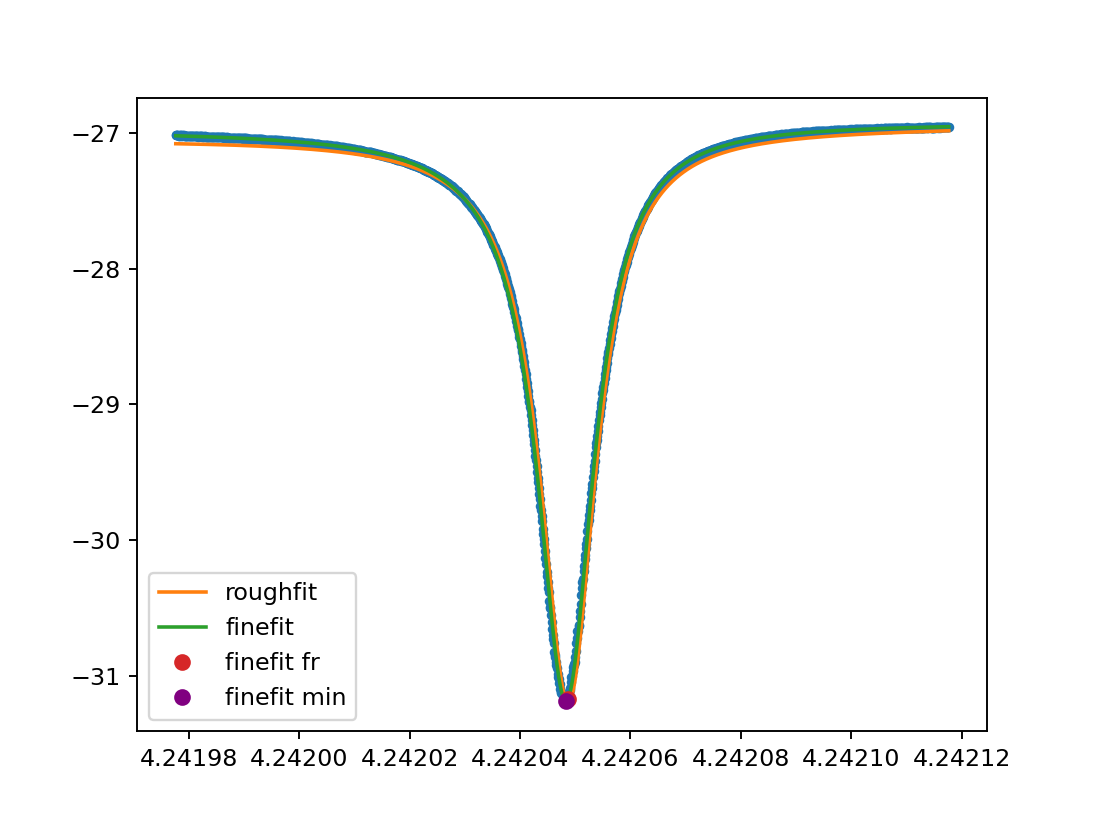

<IPython.core.display.Javascript object>


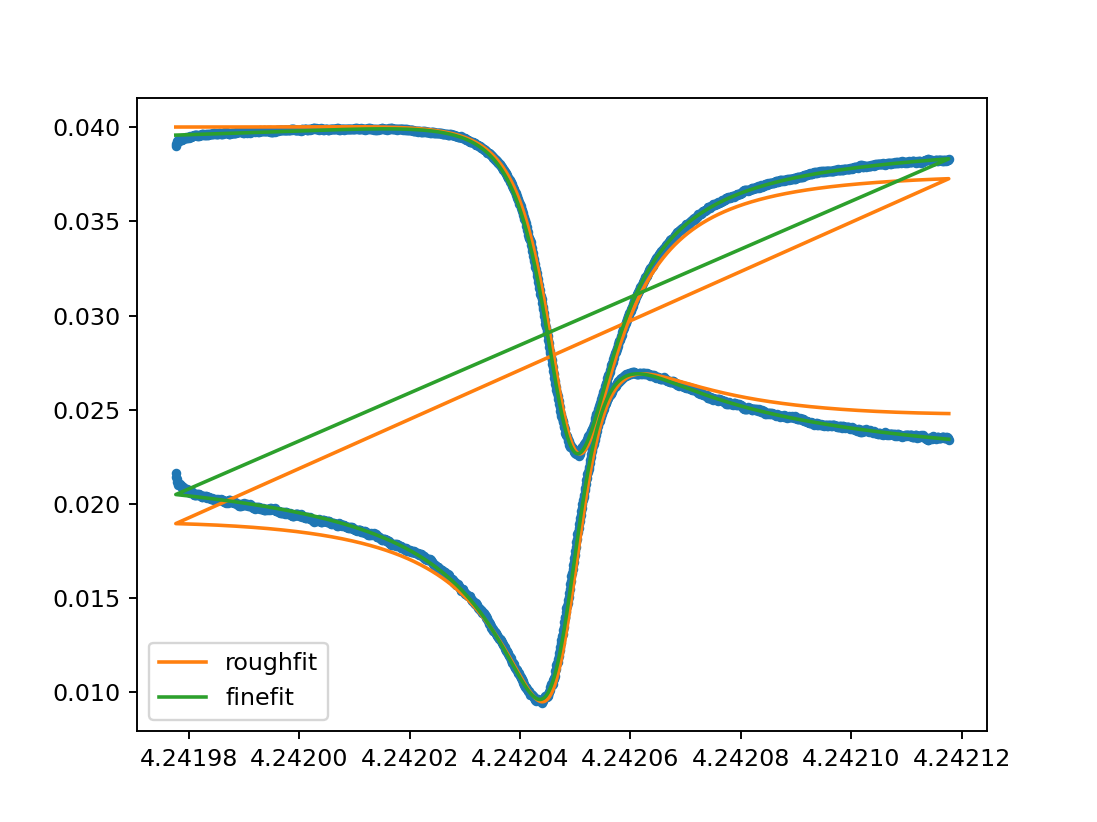

<IPython.core.display.Javascript object>


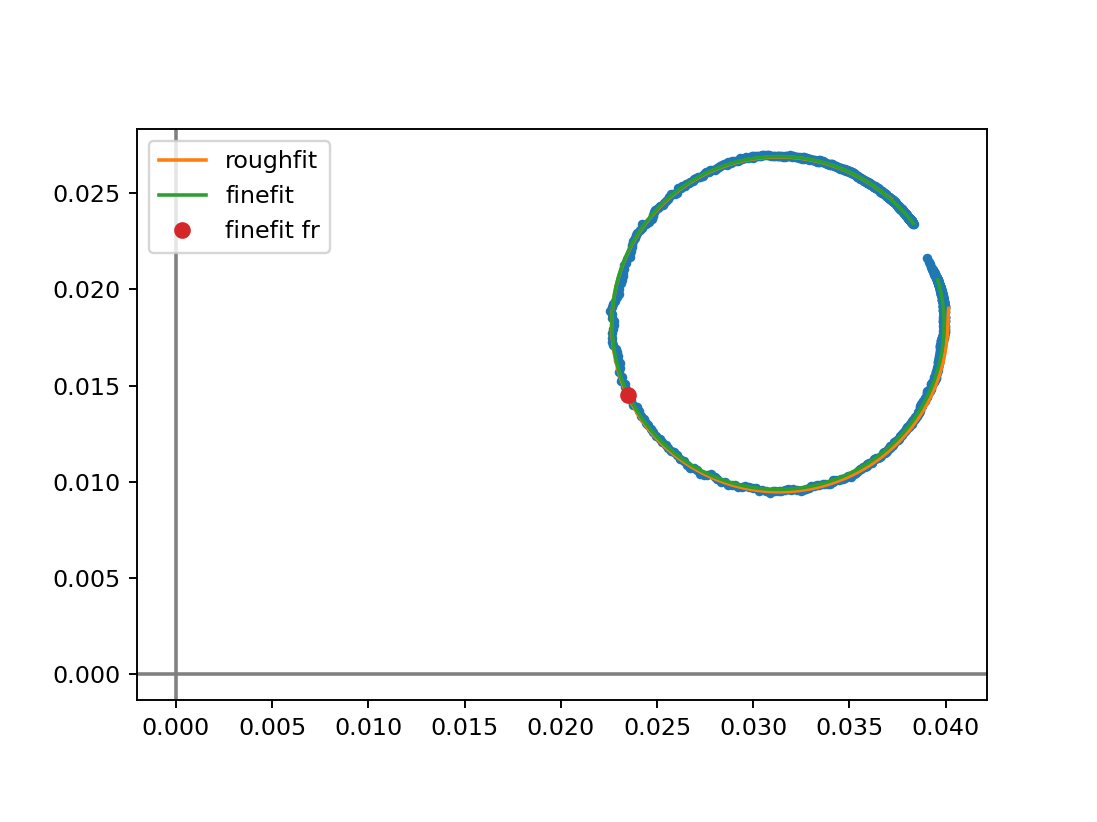

Fr from fit  [GHz]: 4.242048652176038
Fr min curve [GHz]: 4.242048320464618


<IPython.core.display.Javascript object>


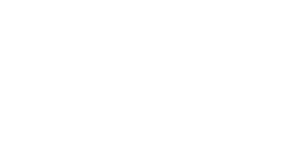

(array([4.24204865]),
 array([263953.56345523]),
 683066.8186992424,
 (0.039160394132688306+0.022021277070095224j),
 -0.06504237068769207,
 (19.121543422917632+2.486398641964398j),
 array([684514.23046044]))

In [7]:
PUf.vna_file_fit(vna_file,[4.24204767],show=True,save=True)

Will separate data into  3000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
Will convert to quasiparticle basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Laser_Data/20221121/20221121_170122/USRP_LaserOn_3.000V_20221121_170122.h5 because override=True!
found 14 pulses
chunk length plugged into welch is 500
chunked data into 3000 timestreams
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Laser_Data/20221121/20221121_170122/USRP_LaserOn_3.000V_20221121_170122_cleaned.h5 because override=True!
number of chunks used to average is 2393
Converting to resonator basis!
Fr from fit  [GHz]: 4242.048652176043
Fr min curve [GHz]: 4242.048320464618
Fr from fit  [GHz]: 4242.048652176043

<IPython.core.display.Javascript object>


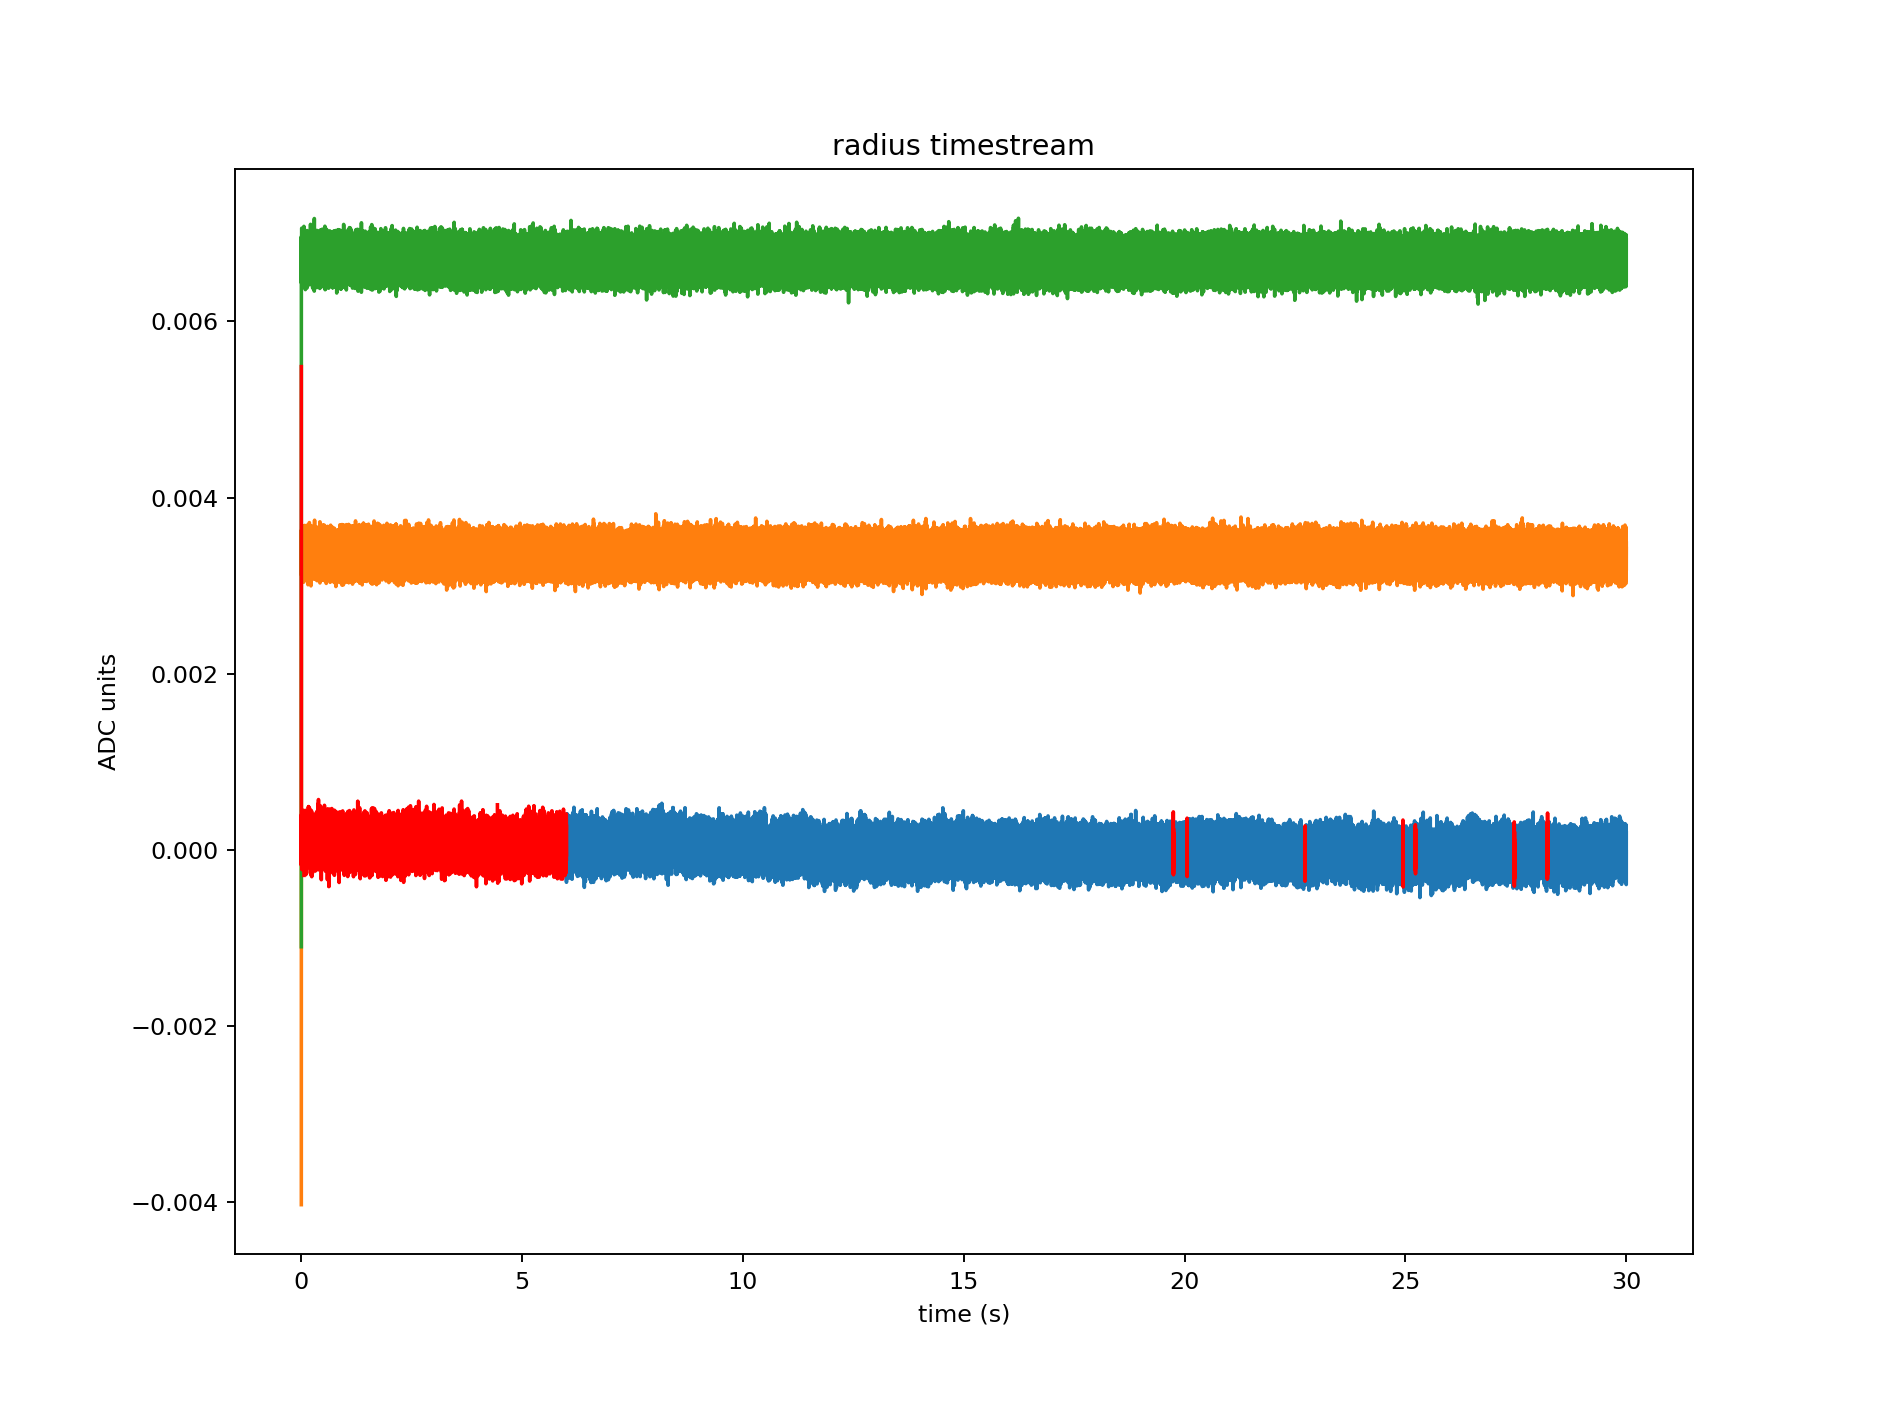

<IPython.core.display.Javascript object>


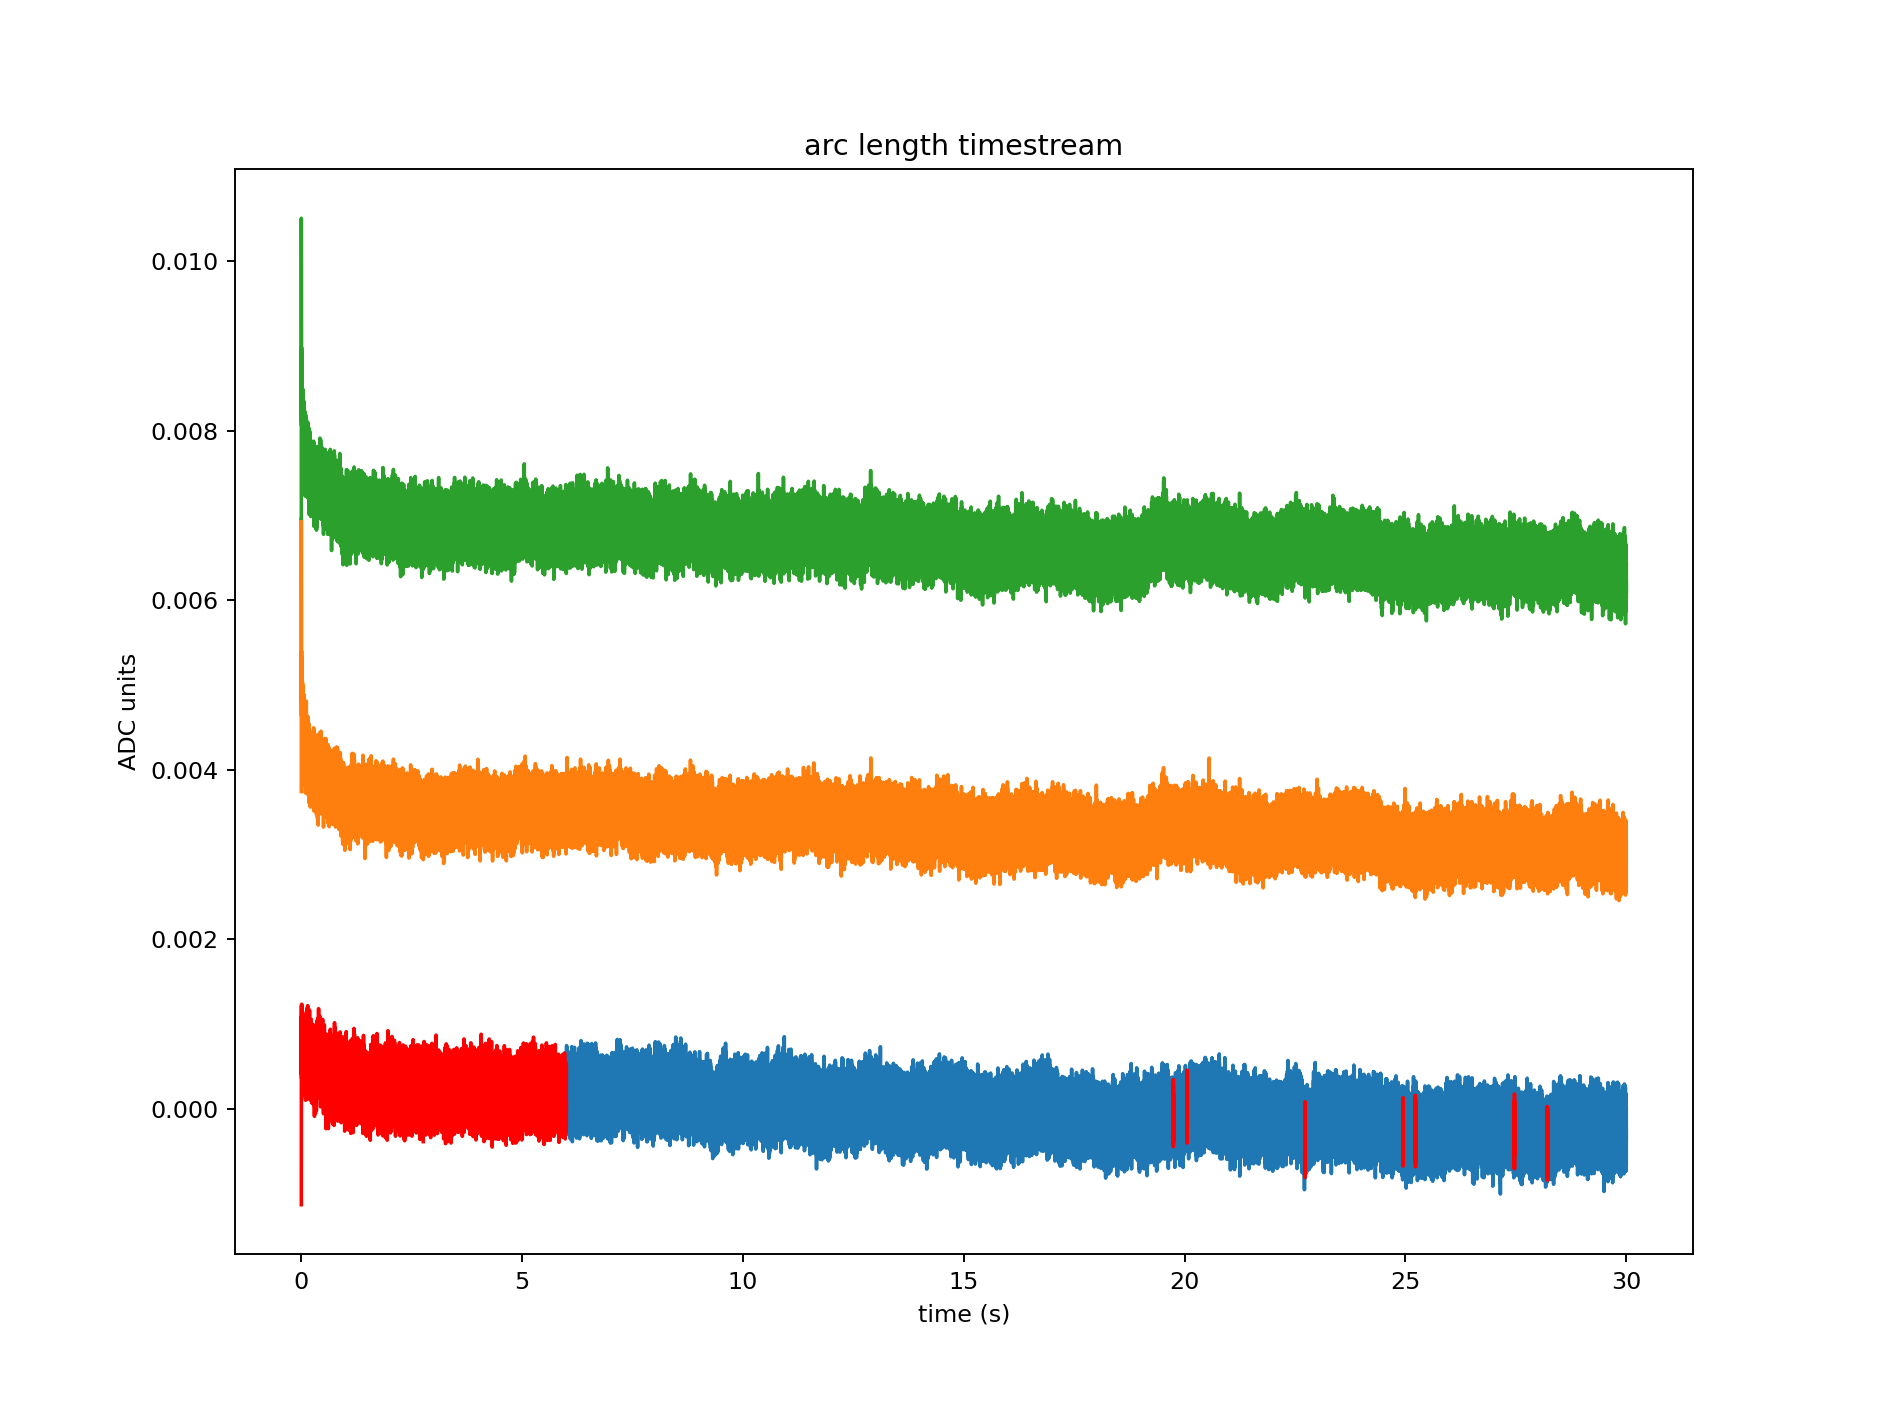

<IPython.core.display.Javascript object>


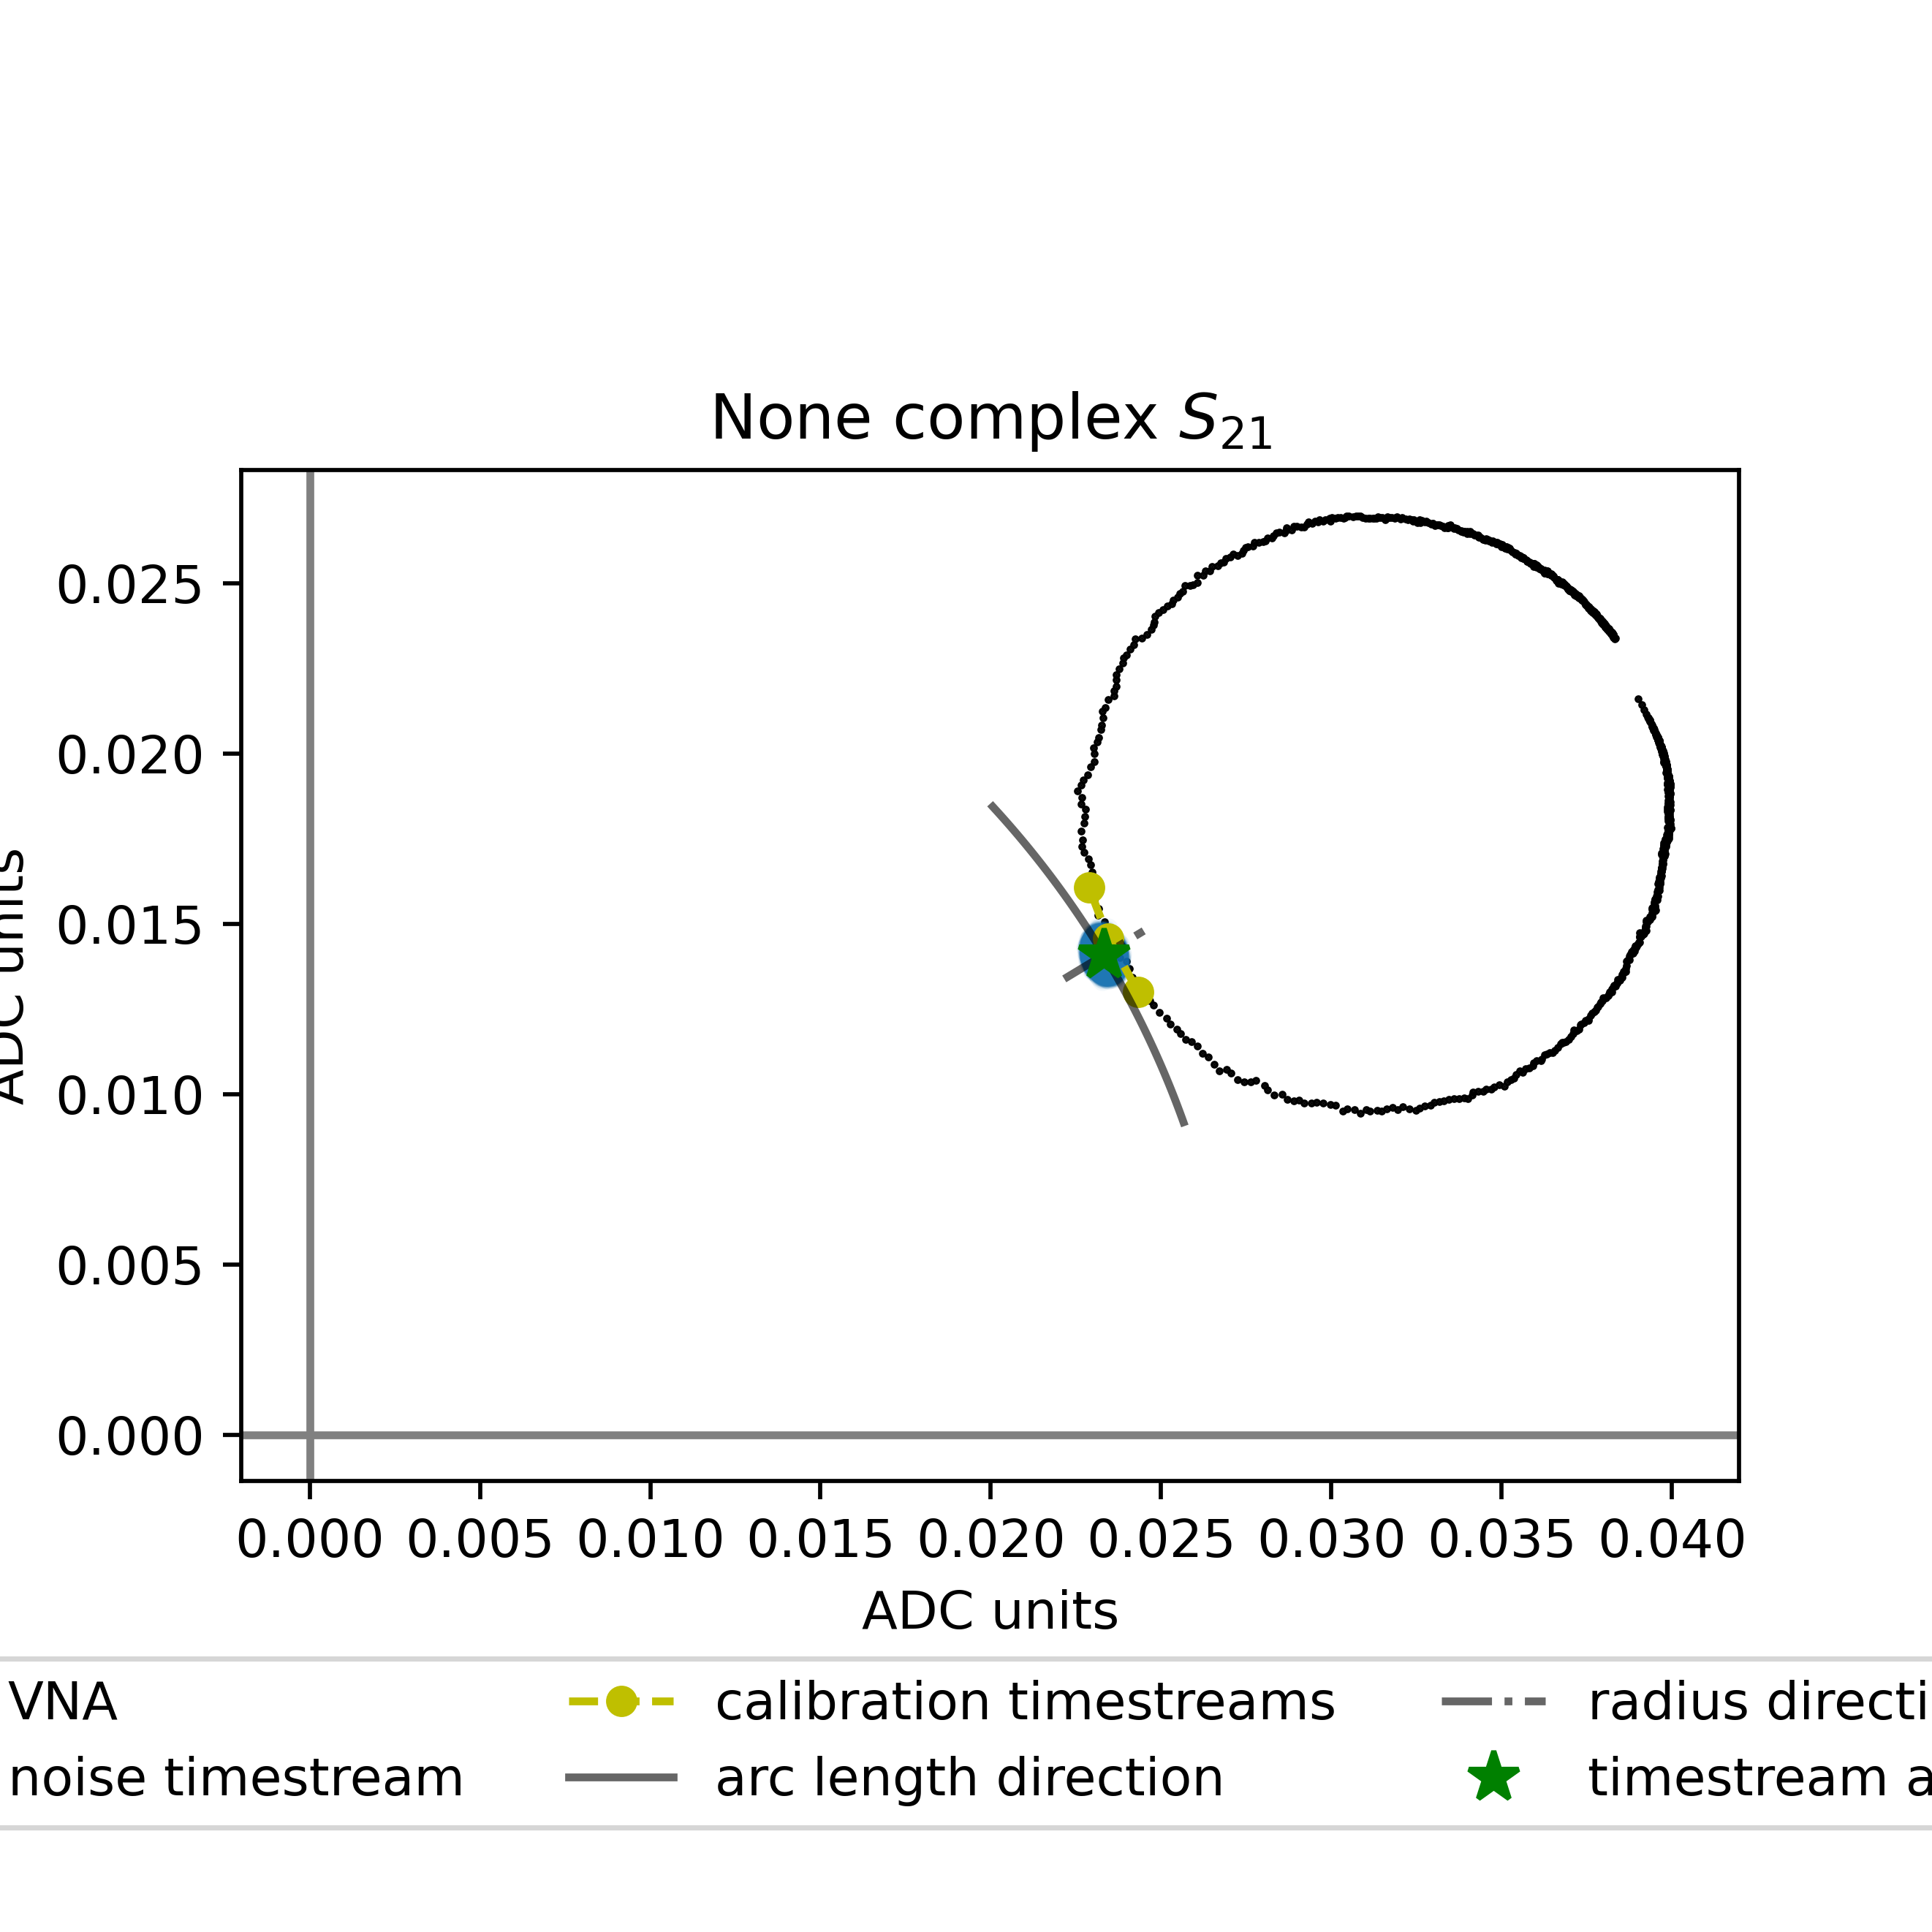

<IPython.core.display.Javascript object>


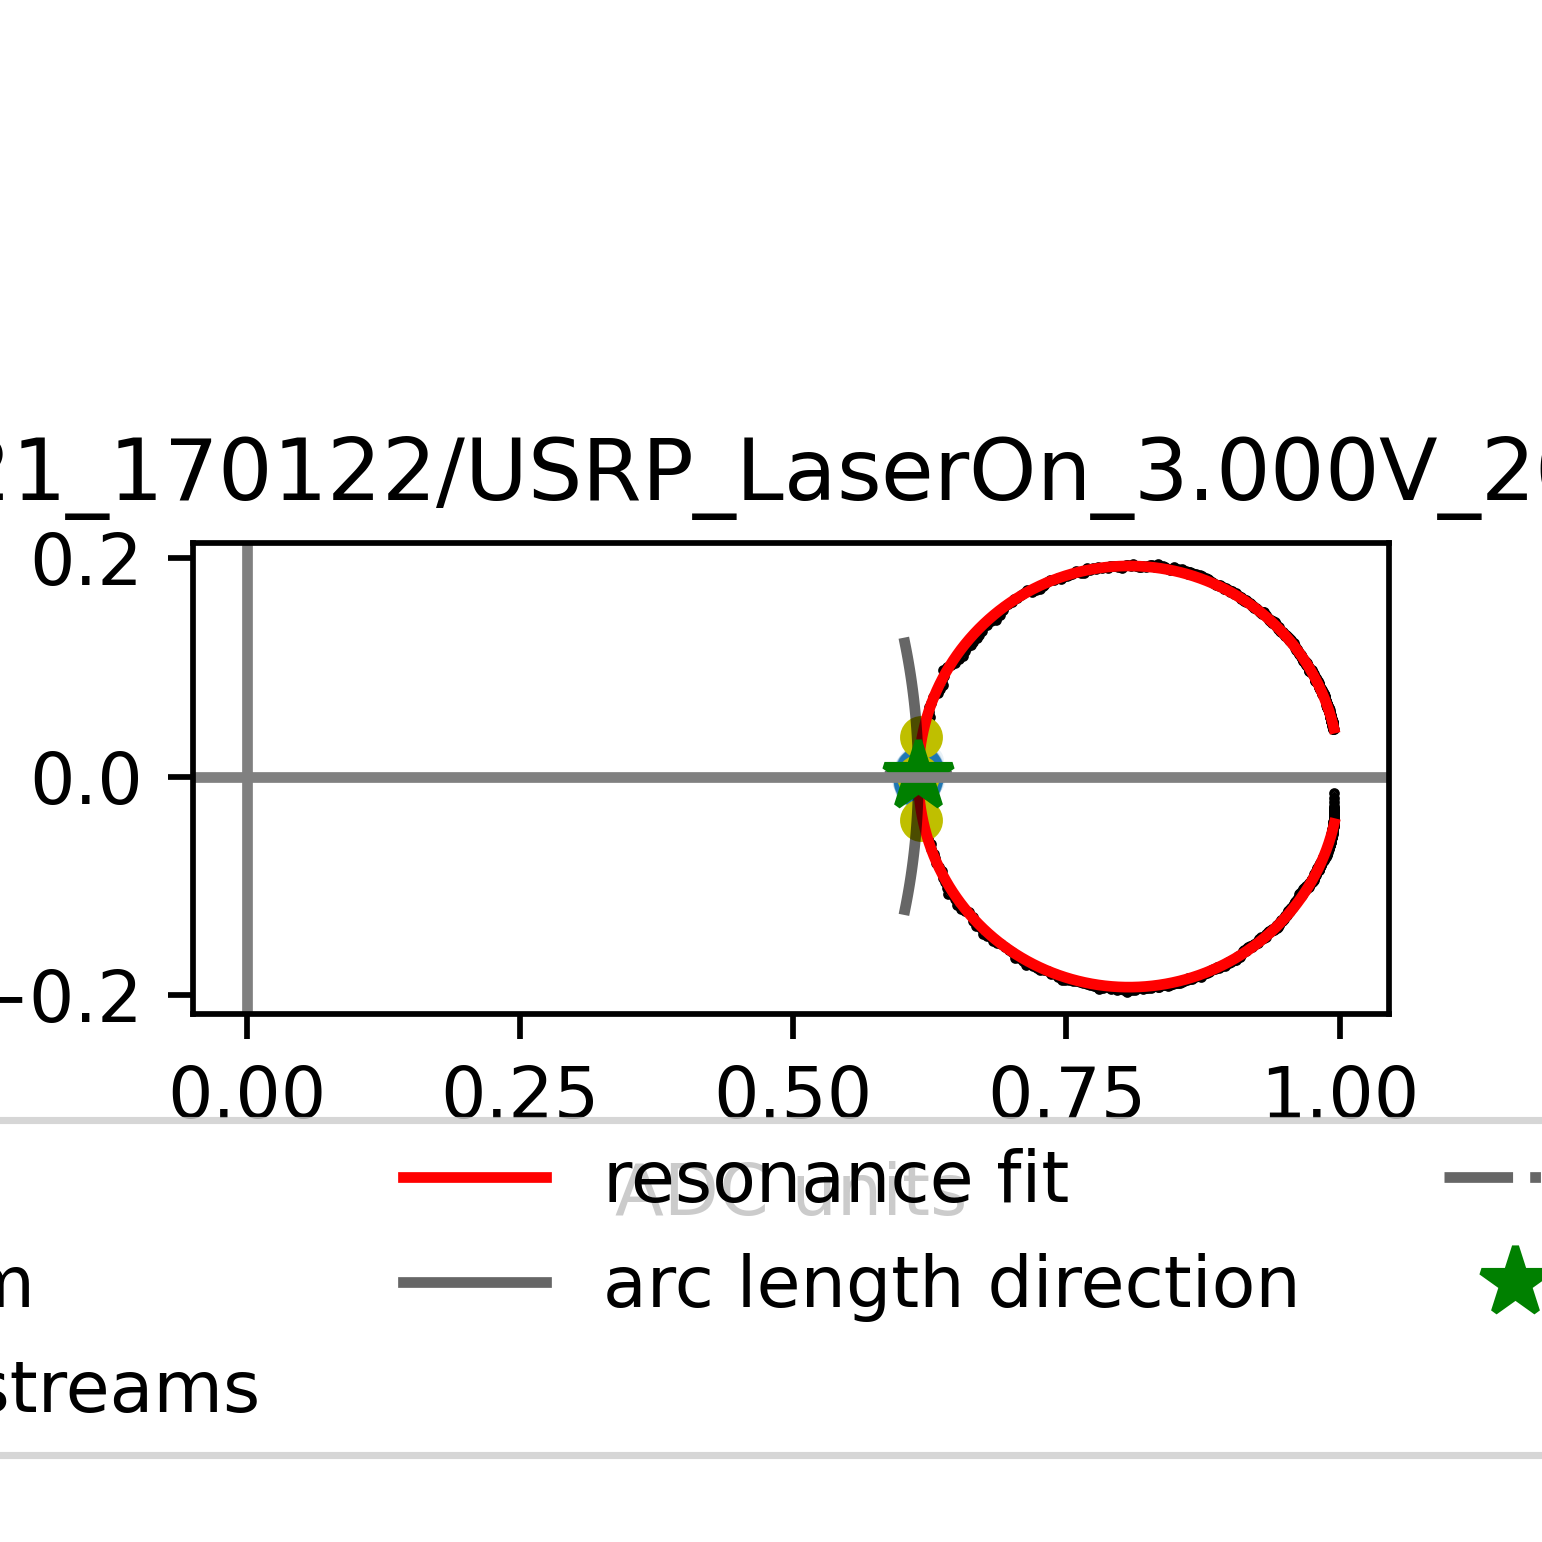

<IPython.core.display.Javascript object>


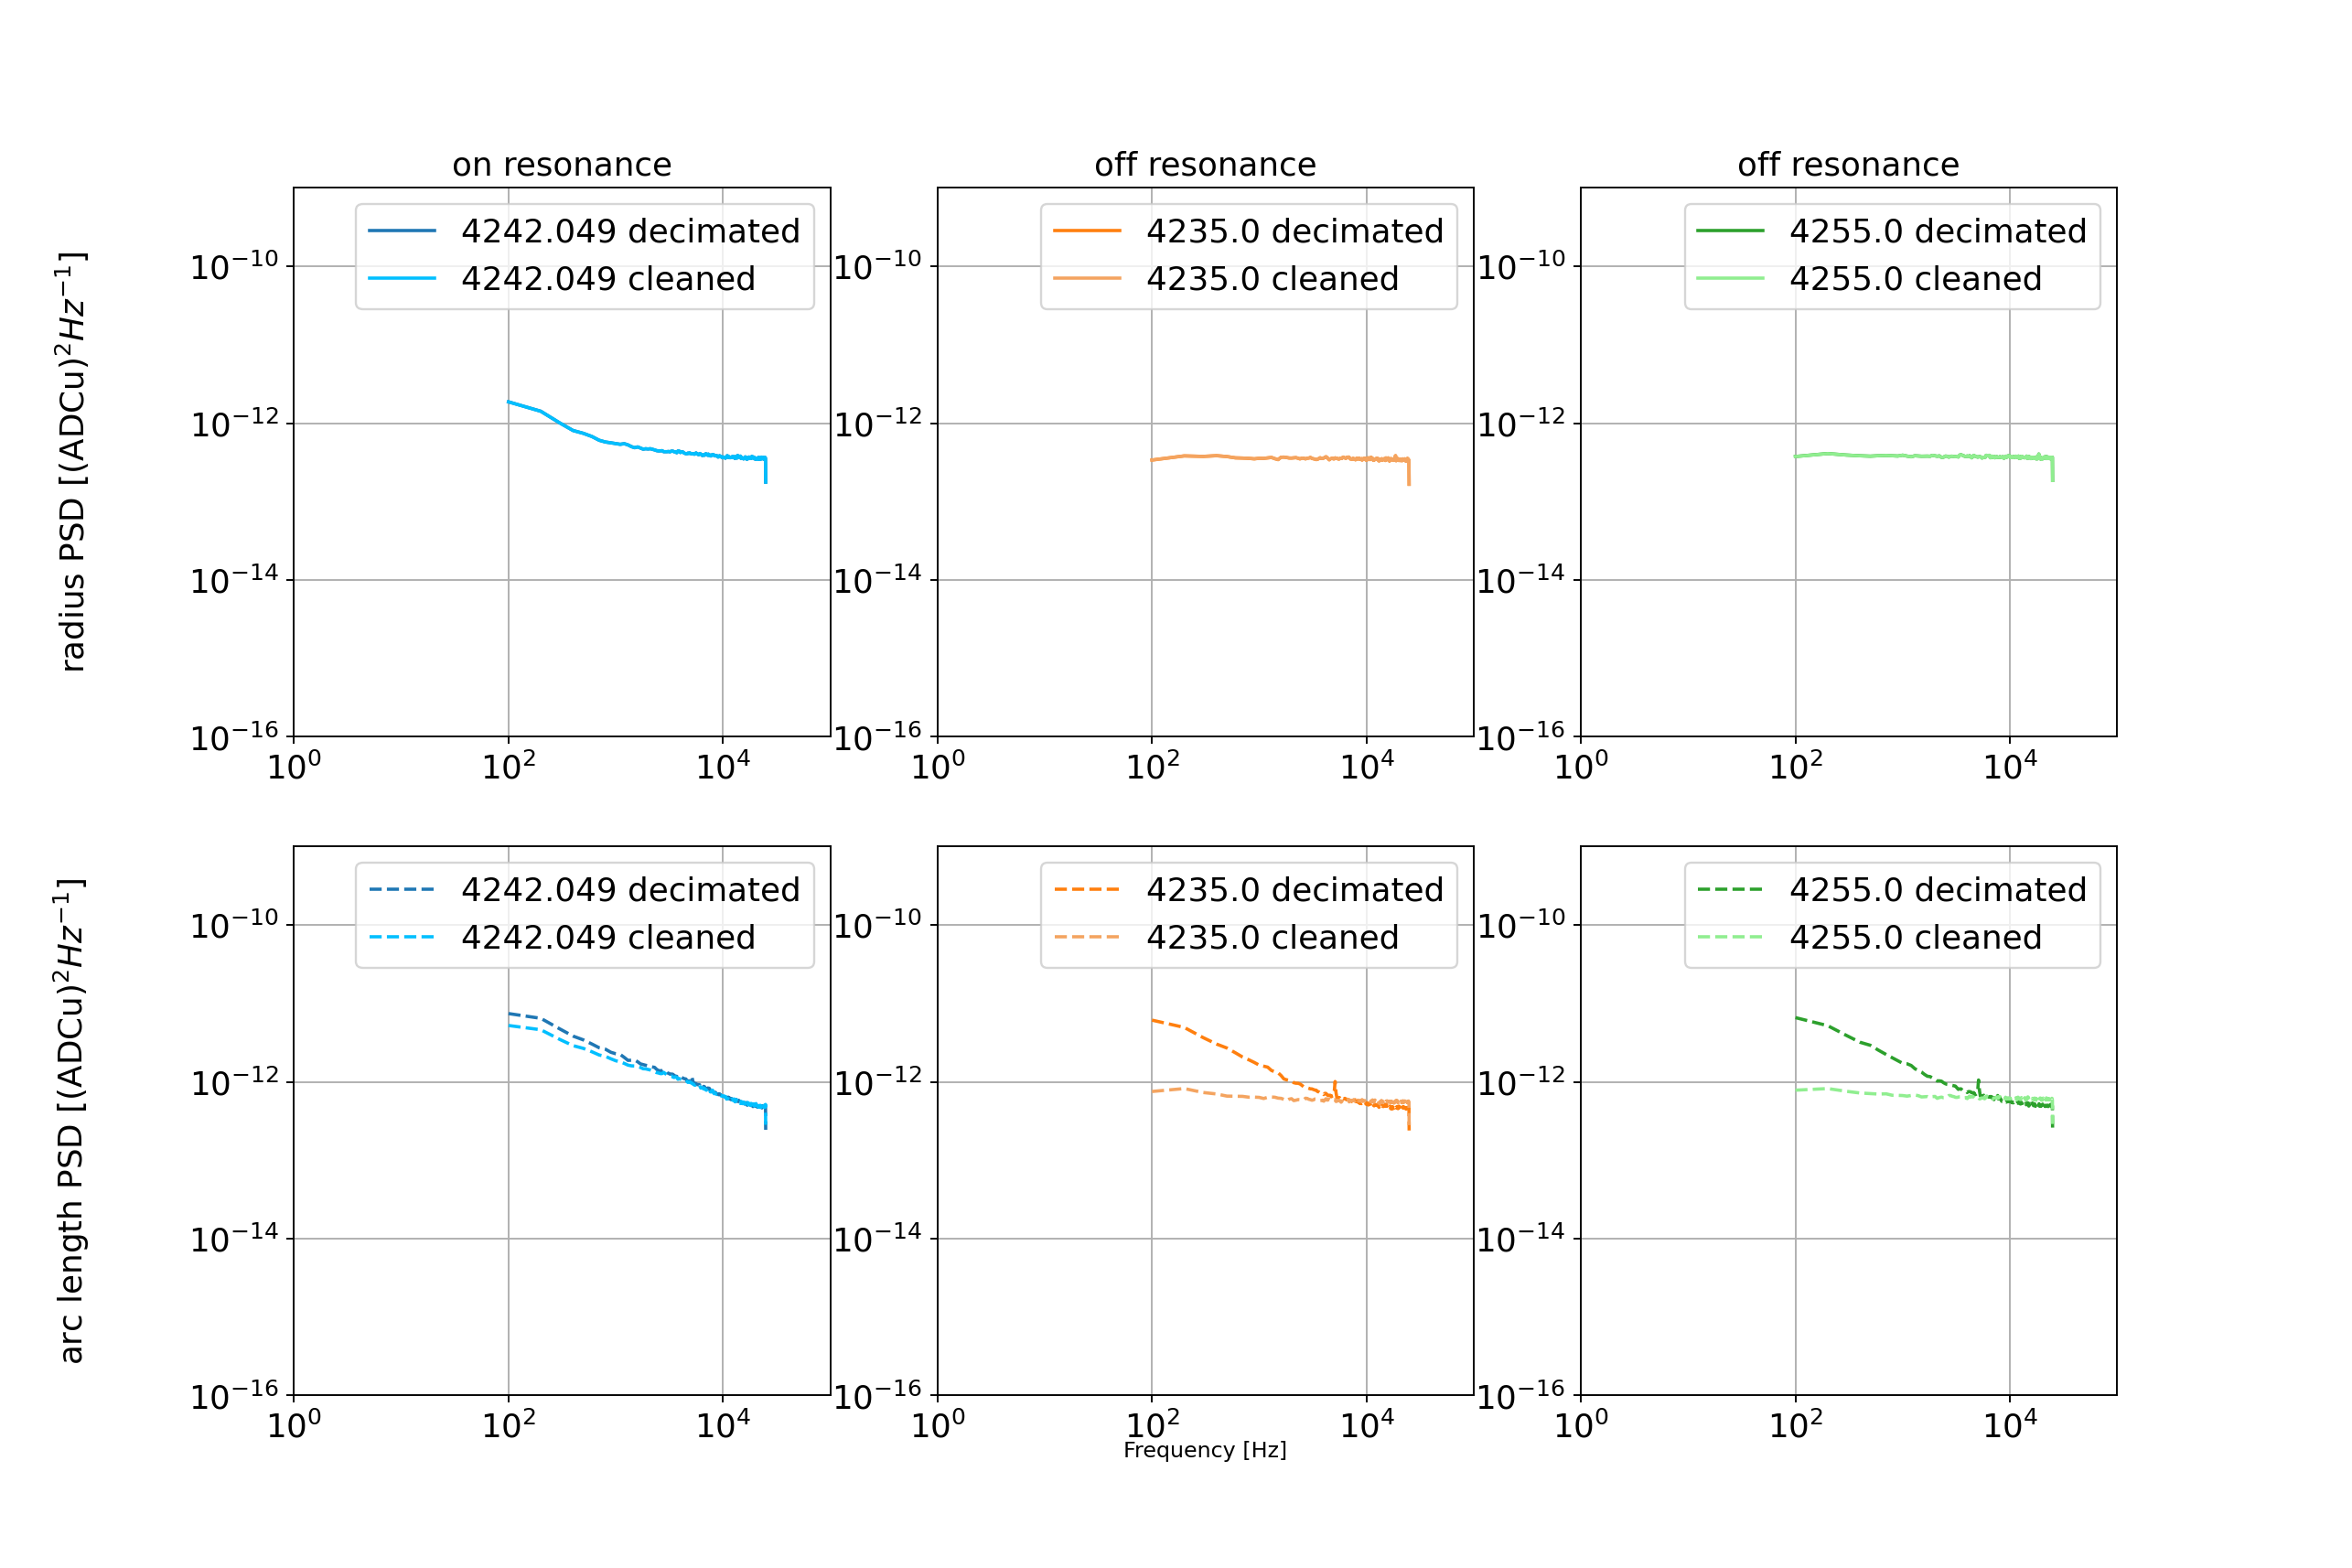

<IPython.core.display.Javascript object>


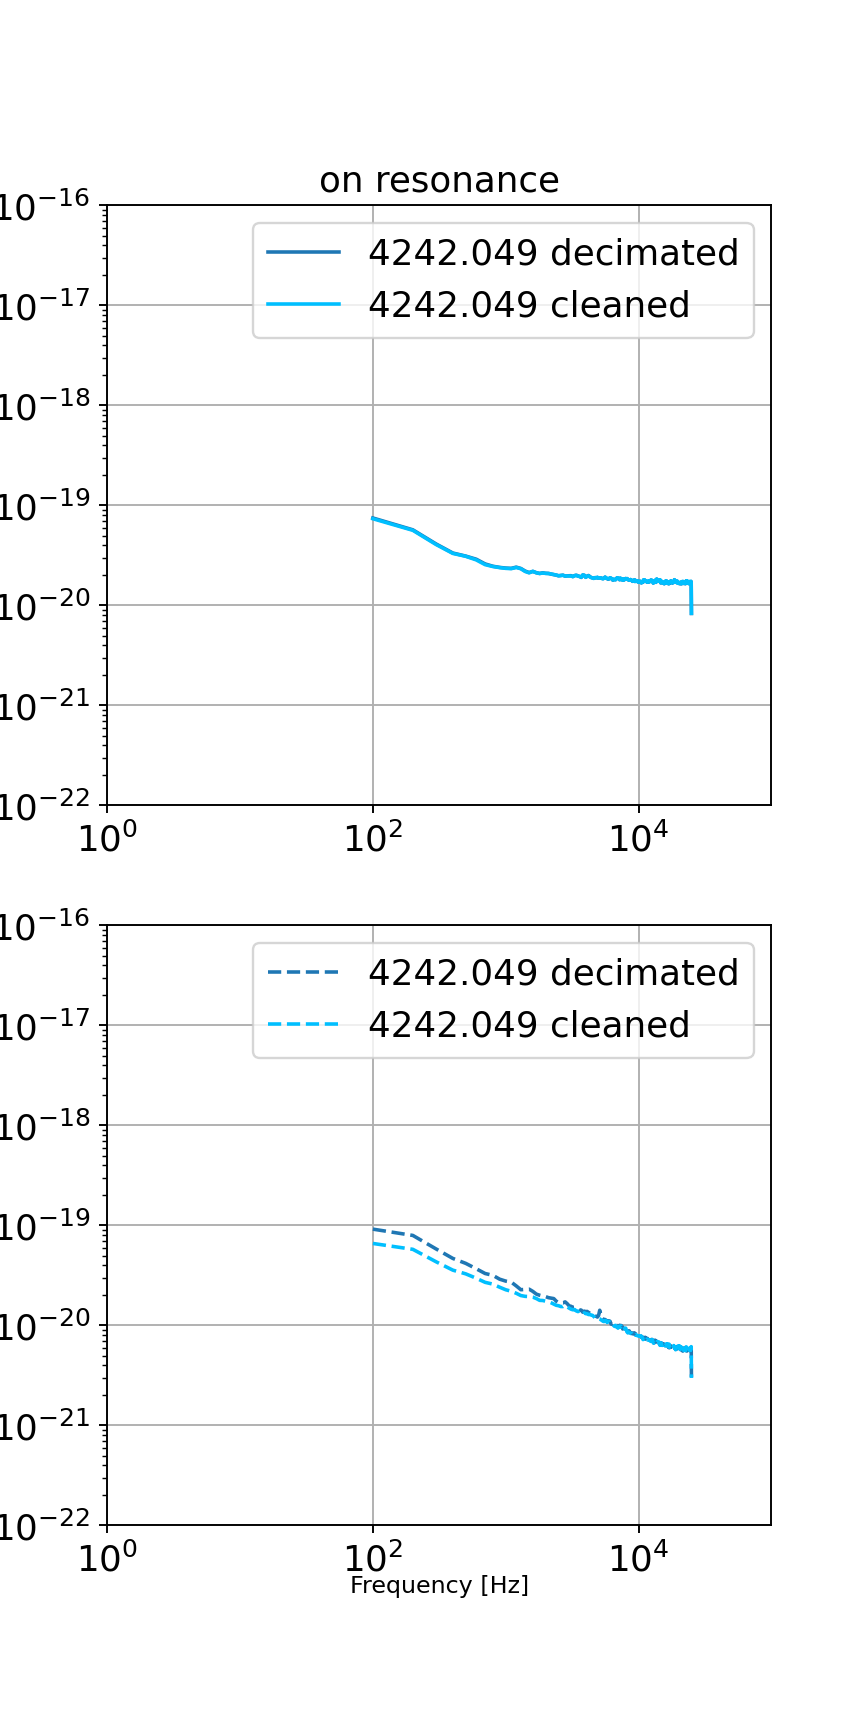

<IPython.core.display.Javascript object>


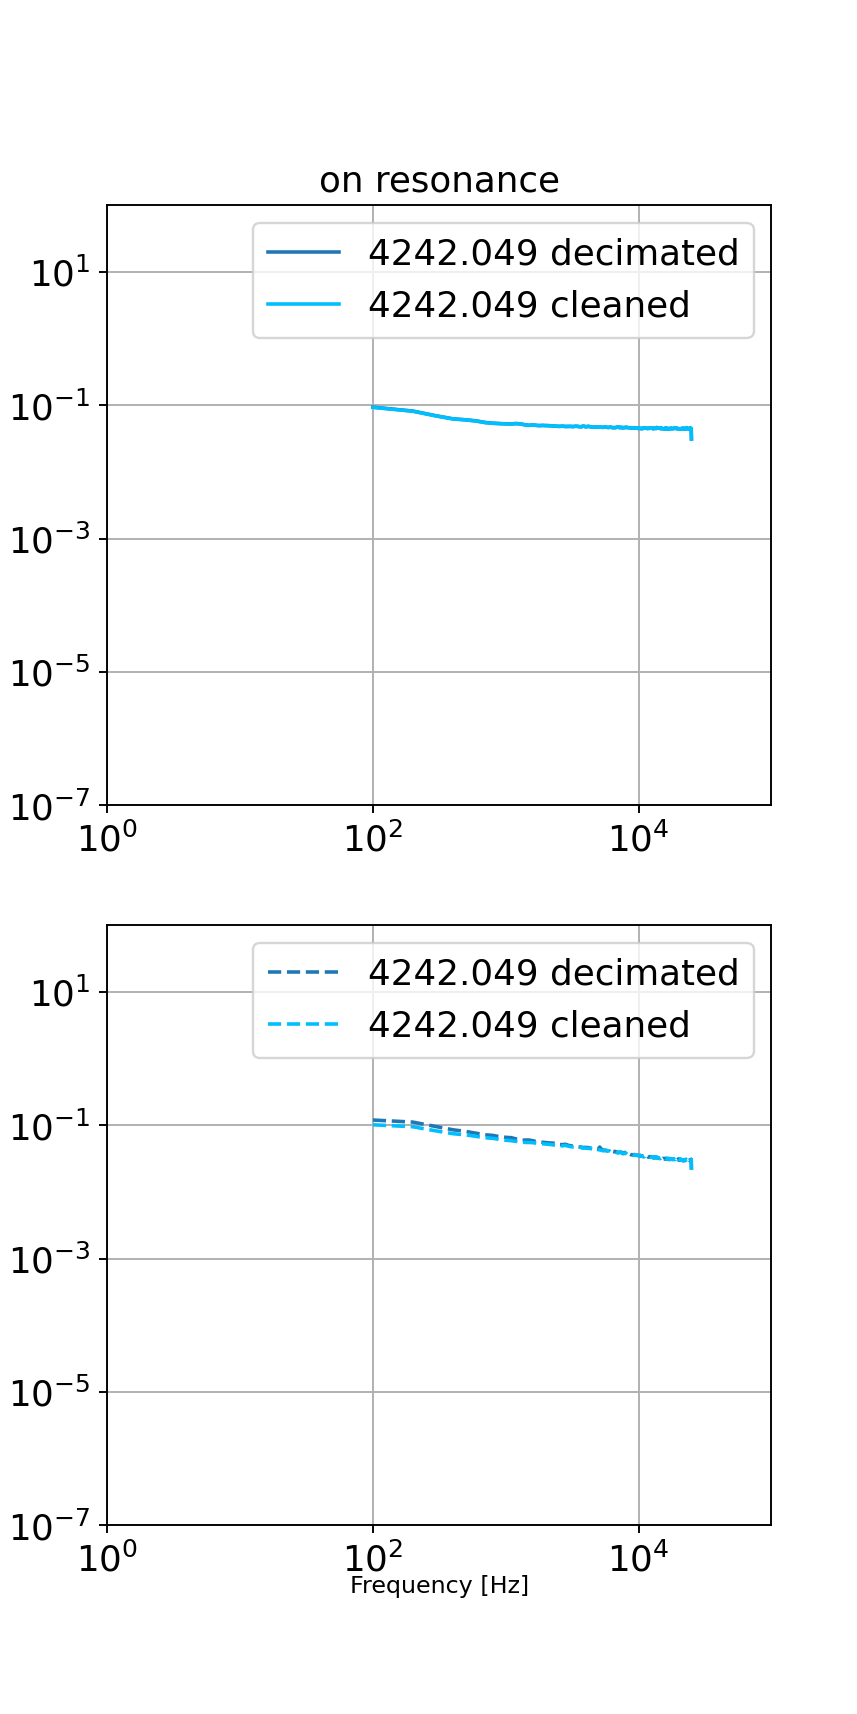

In [8]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[1], vna_file, f_transient=0.2,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals)

In [9]:
print("powers shape:",np.shape(powers))
print("PSDs keys:", PSDs.keys())
print("res kes:", res.keys())
print("timestreams keys:", timestreams.keys())

powers shape: (3,)
PSDs keys: dict_keys(['f', 'radius', 'arc', 'radius uncleaned', 'arc uncleaned', 'fractional radius', 'fractional arc', 'dissipation uncleaned', 'frequency uncleaned', 'dissipation', 'frequency', 'kappa_1', 'kappa_2', 'kappa_1 uncleaned', 'kappa_2 uncleaned'])
res kes: dict_keys(['fr', 'Qr', 'Qc', 'a', 'phi'])
timestreams keys: dict_keys(['time', 'radius', 'arc', 'radius uncleaned', 'arc uncleaned', 'radius coefficient', 'arc coefficient', 'dissipation', 'frequency', 'k1', 'k2'])


<IPython.core.display.Javascript object>


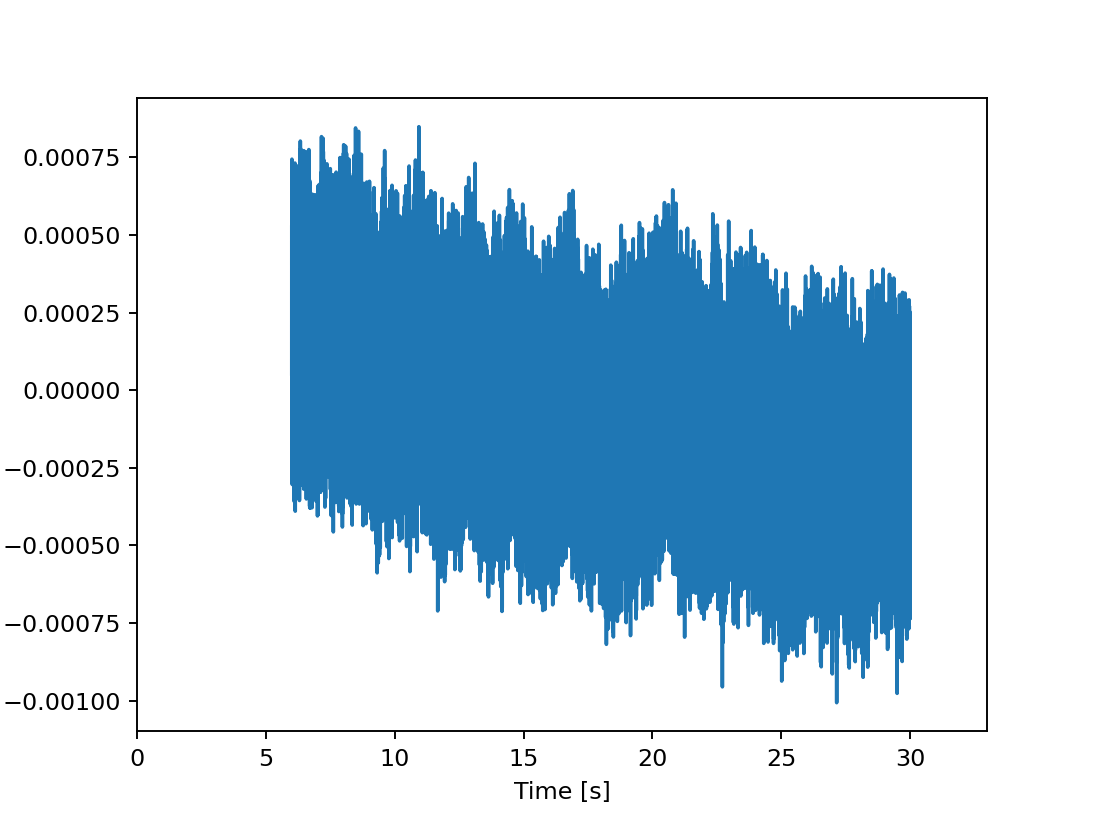

<IPython.core.display.Javascript object>


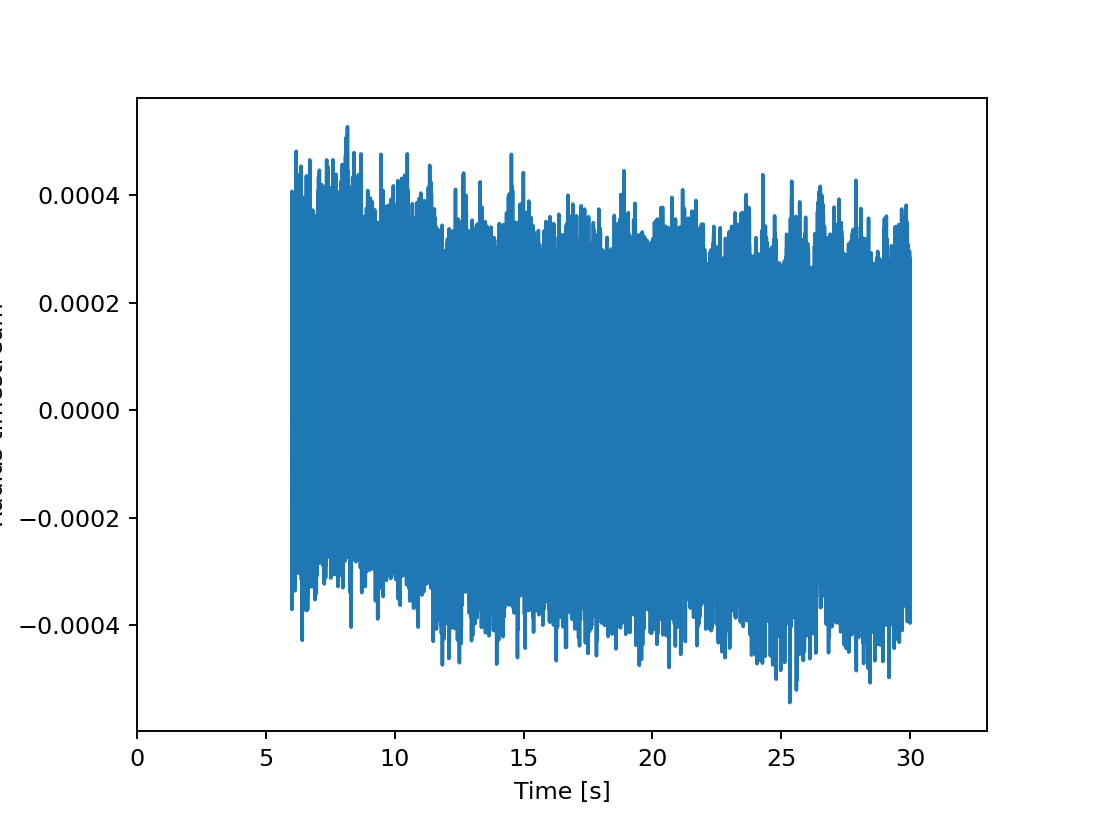

(0.0, 32.9999791)

In [10]:
## Create an axis for the radius timestream
f_1 = plt.figure()
ax1 = f_1.gca()
ax1.set_xlabel(r"Time [s]")
ax1.set_ylabel(r"Arc length timestream")

ax1.plot(timestreams['time'],timestreams['arc uncleaned'][:,0])

ylims=ax1.get_ylim()
ax1.set_ylim(ylims)
ax1.set_xlim([0.0,1.1*timestreams['time'][-1]])

## Create an axis for the radius timestream
f_2 = plt.figure()
ax2 = f_2.gca()
ax2.set_xlabel(r"Time [s]")
ax2.set_ylabel(r"Radius timestream")

ax2.plot(timestreams['time'],timestreams['radius uncleaned'][:,0])

ylims=ax2.get_ylim()
ax2.set_ylim(ylims)
ax2.set_xlim([0.0,1.1*timestreams['time'][-1]])

## Look at cleaned data file

In [11]:
f_in = tone_files[0].split('.')[0]+"_cleaned.h5"
f    = h5py.File(f_in, 'r')
print("Top-level:", f.keys(), f.attrs.keys())
f.close() ; 

Top-level: <KeysViewHDF5 ['angle', 'arc cleaning coefficient', 'cleaned_data', 'radius', 'radius cleaning coefficient', 'sampling_rate']> <KeysViewHDF5 []>


## Look for pulses

In [12]:
f = h5py.File(tone_files[0], 'r')
print(f['pulses'])
f.close()

<HDF5 dataset "pulses": shape (1,), type "<f8">


In [13]:
## Pull a list of pulse times from the file
f = h5py.File(tone_files[0], 'r')
p_times = np.array(f['pulses'])
f.close()

## Strip out the pulses from the transient period
p_times = p_times[p_times > timestreams['time'][0]]

<IPython.core.display.Javascript object>


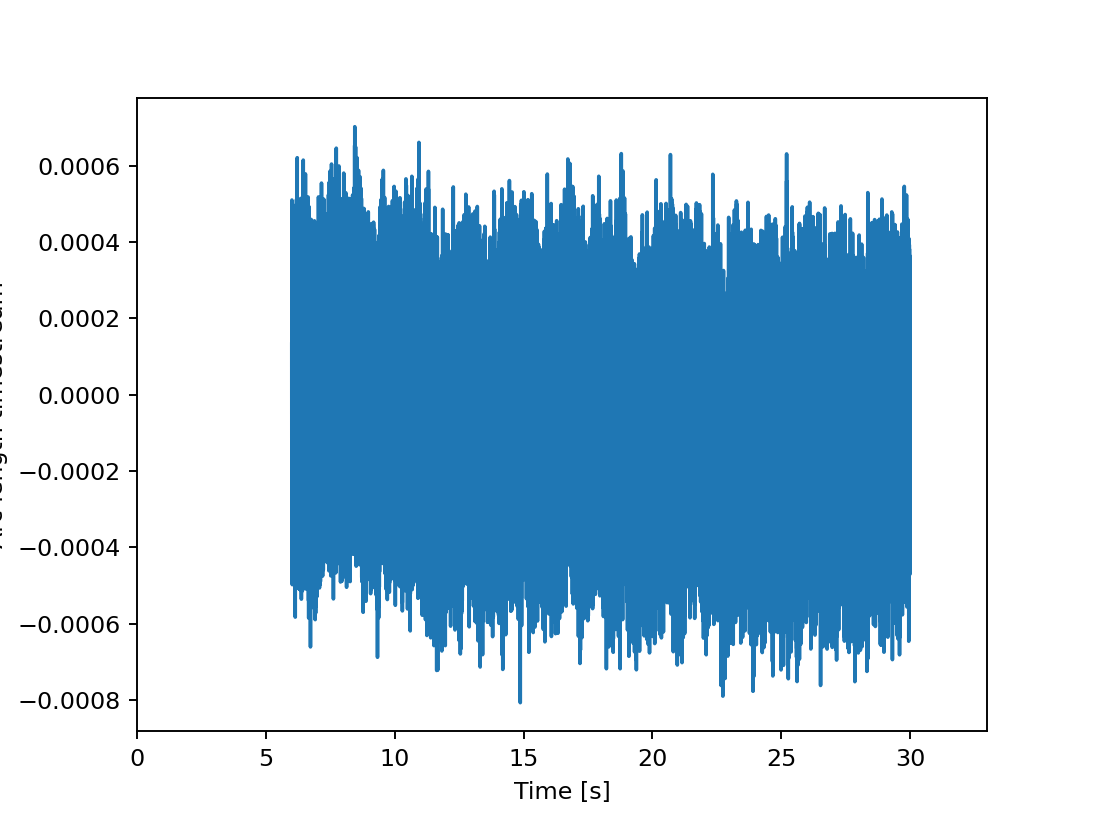

<IPython.core.display.Javascript object>


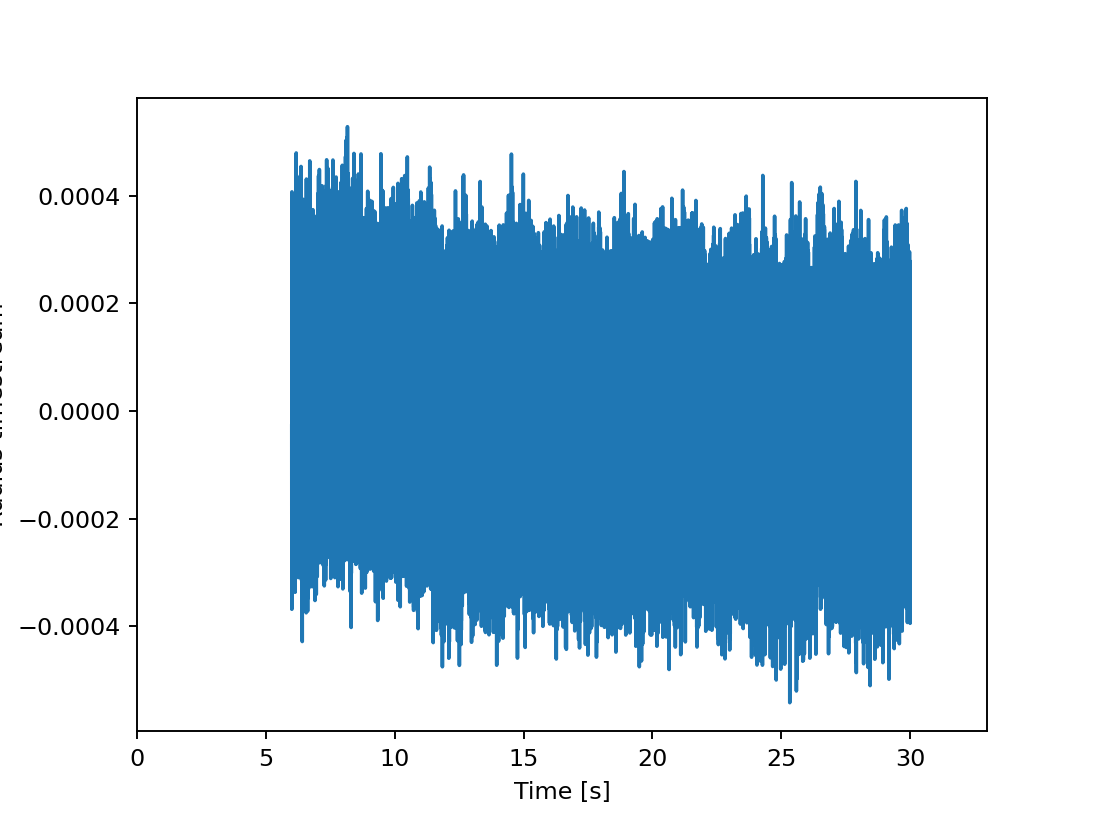

(0.0, 32.9999791)

In [14]:
## Create an axis to overlay pulses onto
f_1 = plt.figure()
ax1 = f_1.gca()
ax1.set_xlabel(r"Time [s]")
ax1.set_ylabel(r"Arc length timestream")

ax1.plot(timestreams['time'],timestreams['arc'][:,0])

ylims=ax1.get_ylim()
# for pt in p_times:
#     ax1.plot(pt*np.ones(2),ylims,'r--')
ax1.set_ylim(ylims)
ax1.set_xlim([0.0,1.1*timestreams['time'][-1]])

## Create an axis to overlay pulses onto
f_2 = plt.figure()
ax2 = f_2.gca()
ax2.set_xlabel(r"Time [s]")
ax2.set_ylabel(r"Radius timestream")

ax2.plot(timestreams['time'],timestreams['radius'][:,0])

ylims=ax2.get_ylim()
# for pt in p_times:
#     ax1.plot(pt*np.ones(2),ylims,'r--')
ax2.set_ylim(ylims)
ax2.set_xlim([0.0,1.1*timestreams['time'][-1]])

<IPython.core.display.Javascript object>


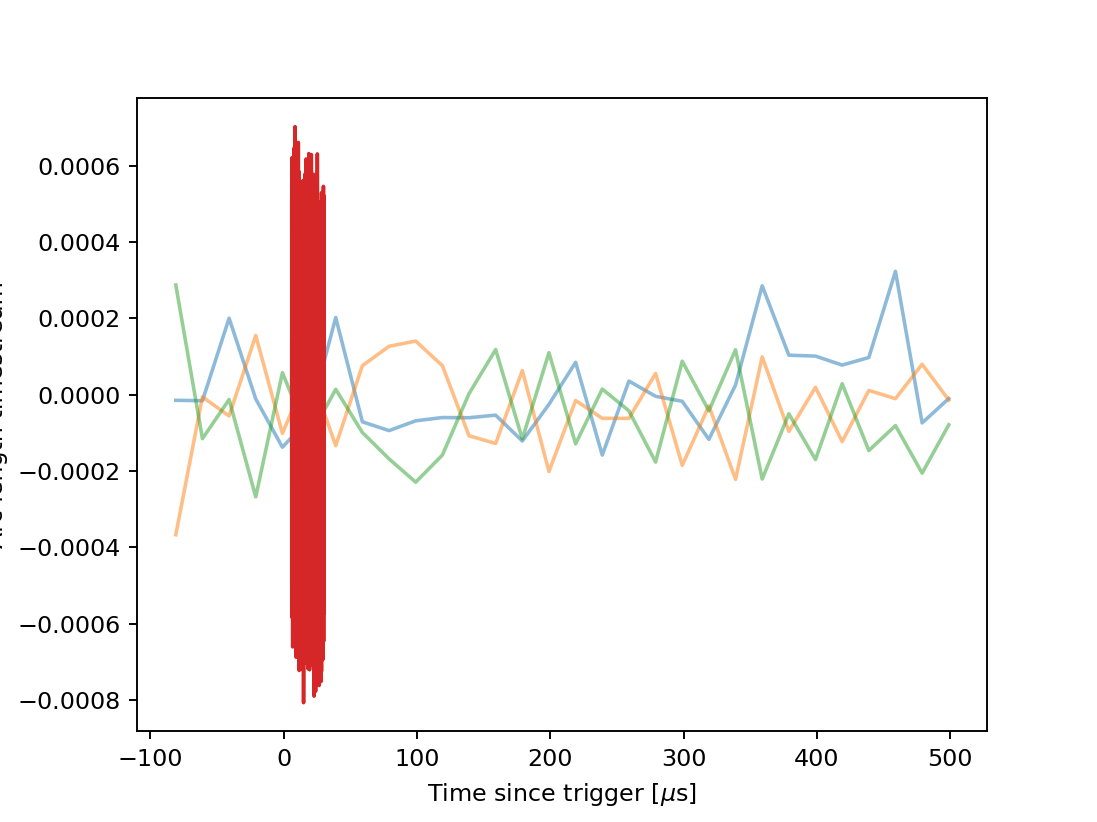

9.972382000000001 9.972282000000002 9.972882000000002 29.999999999822364


In [15]:
## Define a window around the pulse time
pre_win_sec = 100. * 1e-6
pst_win_sec = 500. * 1e-6

## Create an axis to overlay pulses onto
fig = plt.figure()
ax0 = fig.gca()
ax0.set_xlabel(r"Time since trigger [$\mu$s]")
ax0.set_ylabel(r"Arc length timestream")

## What is time resoultion
tstep = (timestreams['time'][1:]-timestreams['time'][:-1])[0]
# print(np.std(timestreams['time'][1:]-timestreams['time'][:-1]))


## Loop over every pulse time
for pt in p_times:
    t_win_min = pt - pre_win_sec
    t_win_max = pt + pst_win_sec
    print(pt,t_win_min,t_win_max,(t_win_max-t_win_min)/tstep)
    
    tvals = timestreams['time'][(timestreams['time']>=t_win_min) * (timestreams['time']<t_win_max)]
    avals = timestreams['arc' ][(timestreams['time']>=t_win_min) * (timestreams['time']<t_win_max)]
    
    ax0.plot((tvals-pt)*1e6, avals, alpha=0.5)

ax0.plot(timestreams['time'],timestreams['arc'][:,0])

# Look at Raw Data -- Cal Delta = 0

In [ ]:
plt.figure()
plt.plot(timesFromRate(rate, len(tone_data[2,:])),logMag(tone_data[2,:]), label="Resonator")
plt.plot(timesFromRate(rate, len(tone_data[0,:])),logMag(tone_data[0,:]), label="Cleaner 1")
plt.plot(timesFromRate(rate, len(tone_data[1,:])),logMag(tone_data[1,:]), label="Cleaner 2")
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure()
plt.hist(logMag(tone_data[2,:]), bins=np.linspace(start=-2.3,stop=-2.0,num=500), label="Resonator")
plt.hist(logMag(tone_data[0,:]), bins=np.linspace(start=-2.3,stop=-2.0,num=500), label="Cleaner 1")
plt.hist(logMag(tone_data[1,:]), bins=np.linspace(start=-2.3,stop=-2.0,num=500), label="Cleaner 2")
plt.legend(loc='best')
plt.xlabel('LogMag')
plt.show()

In [ ]:
cts, edges = np.histogram(logMag(tone_data[2,:]), bins=np.linspace(start=-2.3,stop=-2.2,num=500))
ctrs = 0.5*(edges[1:]+edges[:-1])
plt.figure()
plt.step(edges[:-1],cts,where='post')

In [ ]:
def gauss(x,a,m,s):
    z = (x-m)/s
    return a * np.exp(-0.5*z*z)

from scipy.optimize import curve_fit

In [ ]:
p0 = [np.max(cts),np.mean(logMag(tone_data[2,:])),np.std(logMag(tone_data[2,:]))]
popt,pcov = curve_fit(gauss,ctrs,cts,p0=p0)
perr = np.sqrt(np.diag(pcov))

plt.figure()
plt.step(edges[:-1],cts,where='post')
plt.plot(ctrs,gauss(ctrs,popt[0],popt[1],popt[2]))
plt.show()

print("Mean:", popt[1], "Stdev:", popt[2])
print("Sig/Mu:", popt[2]/popt[1])

In [ ]:
cts0, edges0 = np.histogram(logMag(tone_data[0,:]), bins=np.linspace(start=-2.1,stop=-2.0,num=500))
ctrs0 = 0.5*(edges0[1:]+edges0[:-1])

p00 = [np.max(cts0),np.mean(logMag(tone_data[0,:])),np.std(logMag(tone_data[0,:]))]
popt0,pcov0 = curve_fit(gauss,ctrs0,cts0,p0=p00)
perr0 = np.sqrt(np.diag(pcov0))

cts1, edges1 = np.histogram(logMag(tone_data[1,:]), bins=np.linspace(start=-2.1,stop=-2.0,num=500))
ctrs1 = 0.5*(edges1[1:]+edges1[:-1])

p01 = [np.max(cts1),np.mean(logMag(tone_data[1,:])),np.std(logMag(tone_data[1,:]))]
popt1,pcov1 = curve_fit(gauss,ctrs1,cts1,p0=p01)
perr1 = np.sqrt(np.diag(pcov1))

plt.figure()
plt.step(edges0[:-1],cts0,where='post')
plt.plot(ctrs0,gauss(ctrs0,popt0[0],popt0[1],popt0[2]))

plt.step(edges1[:-1],cts1,where='post')
plt.plot(ctrs1,gauss(ctrs1,popt1[0],popt1[1],popt1[2]))
plt.show()

print("CLEANING TONE 1")
print("Mean:", popt0[1], "Stdev:", popt0[2])
print("Sig/Mu:", popt0[2]/popt0[1])


print("CLEANING TONE 2")
print("Mean:", popt1[1], "Stdev:", popt1[2])
print("Sig/Mu:", popt1[2]/popt1[1])

In [ ]:
cts0, edges0 = np.histogram(phase(tone_data[0,:]), bins=np.linspace(start=3.5,stop=4.4,num=500))
ctrs0 = 0.5*(edges0[1:]+edges0[:-1])

p00 = [np.max(cts0),np.mean(phase(tone_data[0,:])),np.std(phase(tone_data[0,:]))]
popt0,pcov0 = curve_fit(gauss,ctrs0,cts0,p0=p00)
perr0 = np.sqrt(np.diag(pcov0))

cts1, edges1 = np.histogram(phase(tone_data[1,:]), bins=np.linspace(start=3.5,stop=4.4,num=500))
ctrs1 = 0.5*(edges1[1:]+edges1[:-1])

p01 = [np.max(cts1),np.mean(phase(tone_data[1,:])),np.std(phase(tone_data[1,:]))]
popt1,pcov1 = curve_fit(gauss,ctrs1,cts1,p0=p01)
perr1 = np.sqrt(np.diag(pcov1))

ctsR, edgesR = np.histogram(phase(tone_data[2,:]), bins=np.linspace(start=3.5,stop=4.4,num=500))
ctrsR = 0.5*(edgesR[1:]+edgesR[:-1])

p0R = [np.max(ctsR),np.mean(phase(tone_data[2,:])),np.std(phase(tone_data[2,:]))]
poptR,pcovR = curve_fit(gauss,ctrsR,ctsR,p0=p0R)
perrR = np.sqrt(np.diag(pcovR))

plt.figure()
plt.step(edges0[:-1],cts0,where='post')
plt.plot(ctrs0,gauss(ctrs0,popt0[0],popt0[1],popt0[2]),label="CT1 fit")

plt.step(edges1[:-1],cts1,where='post')
plt.plot(ctrs1,gauss(ctrs1,popt1[0],popt1[1],popt1[2]),label="CT2 fit")

plt.step(edgesR[:-1],ctsR,where='post')
plt.plot(ctrsR,gauss(ctrsR,poptR[0],poptR[1],poptR[2]),label="Res fit")

plt.xlabel('Phase [rad]')
plt.legend(loc='best')
plt.show()

print("RESONANT TONE")
print("Mean:", poptR[1], "Stdev:", poptR[2])
print("Sig/Mu:", poptR[2]/poptR[1])

print("CLEANING TONE 1")
print("Mean:", popt0[1], "Stdev:", popt0[2])
print("Sig/Mu:", popt0[2]/popt0[1])

print("CLEANING TONE 2")
print("Mean:", popt1[1], "Stdev:", popt1[2])
print("Sig/Mu:", popt1[2]/popt1[1])

In [ ]:
plt.figure()
plt.plot(timesFromRate(rate, len(tone_data[2,:])),logMag(tone_data[2,:])-0.5*(logMag(tone_data[0,:])+logMag(tone_data[1,:])), label="Cleaned Resonator")
plt.legend(loc='best')
plt.show()

In [ ]:
def movingAvg(data, winsize):
    if (winsize < 2):
        print("Need a larger window")
        return None
    
    ## Make sure the box is odd sized
    if winsize % 2. == 0:
        halfwin  = winsize/2.
        winsize += 1
    else:
        halfwin  = (winsize-1)/2.
        
    ## Create an output container
    data_avg = np.zeros(len(data)-winsize+1)
    
    for i in np.arange(len(data_avg)):
        data_i = int(i+halfwin)
        i_min  = int(data_i-halfwin)
        i_max  = int(data_i+halfwin+1)
        data_avg[i] = np.mean(data[i_min:i_max])
    
    

In [ ]:
plt.figure()
plt.plot(movingAvg(logMag(tone_data[2,:])-0.5*(logMag(tone_data[0,:])+logMag(tone_data[1,:])),15), label="Cleaned Resonator")
plt.show()